Mean squared error: 1.0352211256505806


<Axes: >

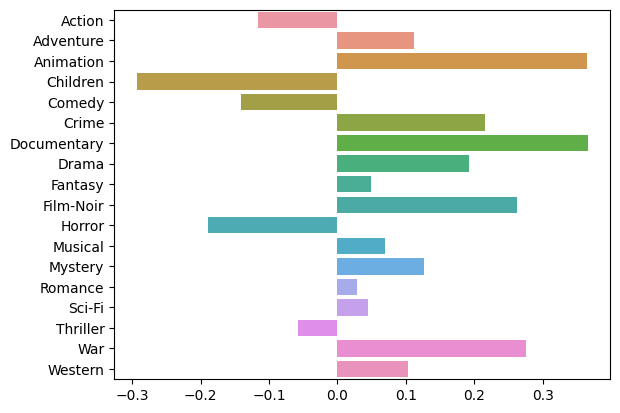

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Load data
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

# Merge ratings and movie data
data = pd.merge(ratings, movies, on='movieId')

# Split genres into separate columns
data = pd.concat([data, data['genres'].str.get_dummies(sep='|')], axis=1)

# Define features and target
features = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
target = 'rating'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# Get coefficients and corresponding genre names
coef = model.coef_
genres = features

# Create bar chart
sns.barplot(x=coef, y=genres)

